In [1]:
!pip install nltk

import nltk

nltk.download('punkt')
nltk.download('stopwords')


from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

import re

def count_syllables_russian(text):
    # Простая эвристика: считаем гласные как слоги
    return len(re.findall(r'[аеёиоуыэюя]', text.lower()))

def count_syllables_english(text):
    # Грубый подсчёт количества слогов в английском тексте
    return len(re.findall(r'[aeiouy]+', text.lower()))

# Разбиваем на строки
en_lines = [line.strip() for line in
"""
O truant Muse what shall be thy amends
For thy neglect of truth in beauty dyed?
Both truth and beauty on my love depends;
So dost thou too, and therein dignified.
Make answer Muse: wilt thou not haply say,
‘Truth needs no colour, with his colour fixed;
Beauty no pencil, beauty’s truth to lay;
But best is best, if never intermixed’?
Because he needs no praise, wilt thou be dumb?
Excuse not silence so, for’t lies in thee
To make him much outlive a gilded tomb
And to be praised of ages yet to be.
Then do thy office, Muse; I teach thee how
To make him seem, long hence, as he shows now.
""".strip().split('\n')]
ru_lines = [line.strip() for line in """
О, ветреная муза,
отчего,
Отвергнув правду в блеске красоты,
Ты не рисуешь друга моего,
Чьей доблестью прославлена и ты?
Но, может быть, ты скажешь мне в ответ,
Что красоту не надо украшать,
Что правде придавать не надо цвет
И лучшее не стоит улучшать.
Да, совершенству не нужна хвала,
Но ты ни слов, ни красок не жалей,
Чтоб в славе красота пережила
Свой золотом покрытый мавзолей.

Нетронутым — таким, как в наши дни,
Прекрасный образ миру сохрани!
""".strip().split('\n')]
en_syl = [count_syllables_english(line) for line in en_lines]
ru_syl = [count_syllables_russian(line) for line in ru_lines]

print("Слоги в строках (англ):", en_syl)
print("Слоги в строках (рус):", ru_syl)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Слоги в строках (англ): [10, 10, 11, 10, 12, 11, 10, 11, 12, 12, 12, 11, 12, 12]
Слоги в строках (рус): [7, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 10, 10]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
pip install sentence-transformers

In [3]:
from sentence_transformers import SentenceTransformer, util
import torch

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Кодируем строки
en_embeddings = model.encode(en_lines, convert_to_tensor=True)
ru_embeddings = model.encode(ru_lines, convert_to_tensor=True)

# Считаем косинусное сходство
cosine_scores = util.cos_sim(en_embeddings, ru_embeddings)

for i in range(len(en_lines)):
    print(f"Строка {i+1}: сходство = {cosine_scores[i][i]:.3f}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Строка 1: сходство = 0.397
Строка 2: сходство = 0.355
Строка 3: сходство = 0.628
Строка 4: сходство = 0.133
Строка 5: сходство = 0.366
Строка 6: сходство = 0.220
Строка 7: сходство = 0.697
Строка 8: сходство = 0.237
Строка 9: сходство = 0.307
Строка 10: сходство = 0.442
Строка 11: сходство = 0.072
Строка 12: сходство = 0.380
Строка 13: сходство = 0.211
Строка 14: сходство = 0.268


In [4]:
from sentence_transformers import SentenceTransformer, util
import torch

# Загрузка модели
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Кодируем строки
en_embeddings = model.encode(en_lines, convert_to_tensor=True)
ru_embeddings = model.encode(ru_lines, convert_to_tensor=True)

# Считаем косинусное сходство между всеми парами строк
cosine_scores = util.cos_sim(en_embeddings, ru_embeddings)

# Извлекаем сходство "один к одному" — диагональ матрицы
similarities = [cosine_scores[i][i].item() for i in range(min(len(en_lines), len(ru_lines)))]

# Вычисляем среднее сходство
average_similarity = sum(similarities) / len(similarities)

# Выводим результаты
for i, sim in enumerate(similarities):
    print(f"Строка {i+1}: сходство = {sim:.3f}")

print(f"\nСреднее семантическое сходство: {average_similarity:.3f}")

Строка 1: сходство = 0.397
Строка 2: сходство = 0.355
Строка 3: сходство = 0.628
Строка 4: сходство = 0.133
Строка 5: сходство = 0.366
Строка 6: сходство = 0.220
Строка 7: сходство = 0.697
Строка 8: сходство = 0.237
Строка 9: сходство = 0.307
Строка 10: сходство = 0.442
Строка 11: сходство = 0.072
Строка 12: сходство = 0.380
Строка 13: сходство = 0.211
Строка 14: сходство = 0.268

Среднее семантическое сходство: 0.336


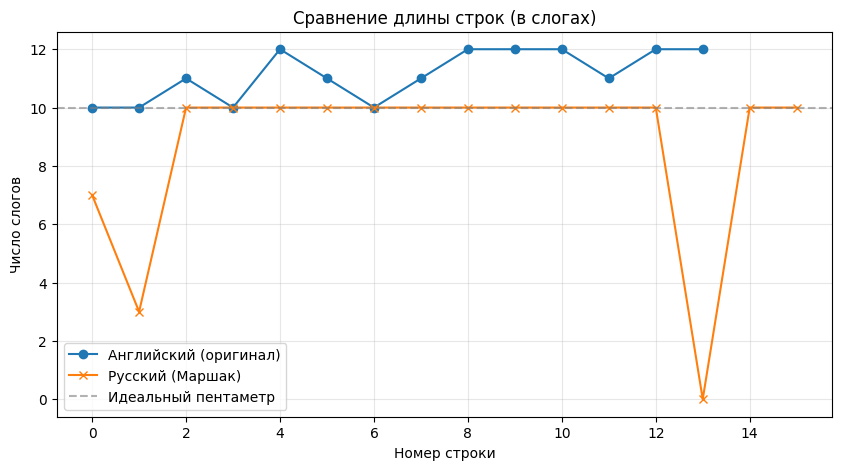

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(en_syl, label='Английский (оригинал)', marker='o')
plt.plot(ru_syl, label='Русский (Маршак)', marker='x')
plt.axhline(10, color='gray', linestyle='--', alpha=0.6, label='Идеальный пентаметр')
plt.title('Сравнение длины строк (в слогах)')
plt.xlabel('Номер строки')
plt.ylabel('Число слогов')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
